# !IMPORTANT

In [24]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mengatur visualisasi
sns.set(style="whitegrid")

In [2]:
# Memuat dataset
dirloc = os.getcwd()
train_data = pd.read_csv(f'{dirloc}/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv(f'{dirloc}/house-prices-advanced-regression-techniques/test.csv')

# Pastikan hanya kolom numerik
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

# Pastikan hanya kolom object
categorical_cols = train_data.select_dtypes(include=['object']).columns

# Analisis Deskriptif Awal

## Display data

In [3]:
# Menampilkan beberapa baris pertama dari dataset
display(train_data.head())

# Deskripsi statistik dari data numerik
display(train_data.describe())

# Info dari dataset untuk melihat tipe data dan nilai yang hilang
display(train_data.info())


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

### Observasi Utama dari informasi data:

1. **Nilai yang Hilang**: Beberapa kolom memiliki jumlah nilai yang hilang yang signifikan. Contohnya:
   - `Alley` (hanya 91 entri yang tidak kosong dari 1460): Menunjukkan bahwa sebagian besar properti tidak memiliki akses gang.
   - `PoolQC` (hanya 7 entri yang tidak kosong): Menggambarkan bahwa sangat sedikit properti yang memiliki kolam renang, sehingga fitur ini mungkin tidak berpengaruh besar terhadap keseluruhan data.
   - `MiscFeature` (hanya 54 entri yang tidak kosong): Kasus serupa dengan `PoolQC`, di mana fitur ini jarang dan mungkin tidak kritis untuk semua jenis analisis.
   - `Fence` (hanya 281 entri yang tidak kosong): Jumlah data yang hilang moderat menunjukkan bahwa banyak properti tidak memiliki fitur ini.
   - Kolom yang terkait dengan ruang bawah tanah (`BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`) dan garasi (`GarageType`, `GarageYrBlt`, `GarageFinish`, `GarageQual`, `GarageCond`) memiliki pola data yang hilang serupa, yang kemungkinan menunjukkan properti tanpa ruang bawah tanah atau garasi.

2. **Data Numerik vs. Kategorikal**:
   - Dataset ini mengandung campuran data numerik (35 kolom) dan kategorikal (43 kolom). Variasi ini memerlukan strategi yang berbeda untuk persiapan dan analisis data.

## Visualisasi Distribusi Data

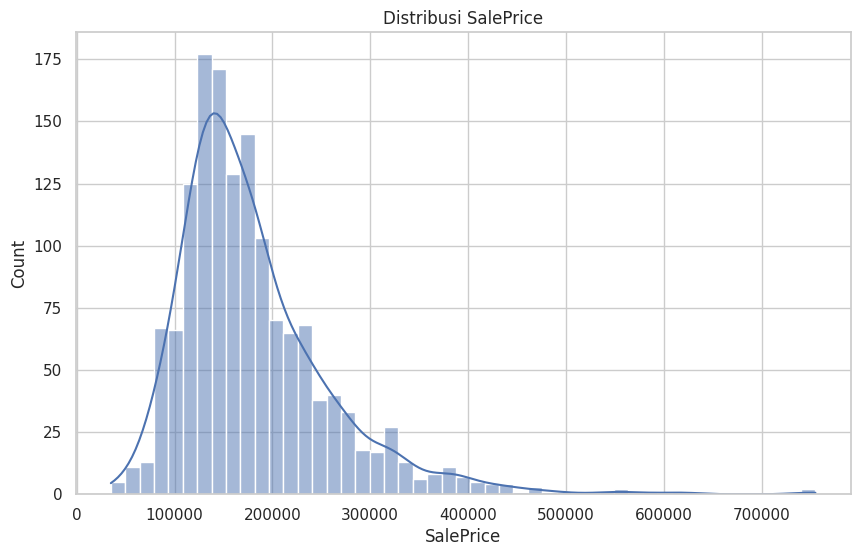

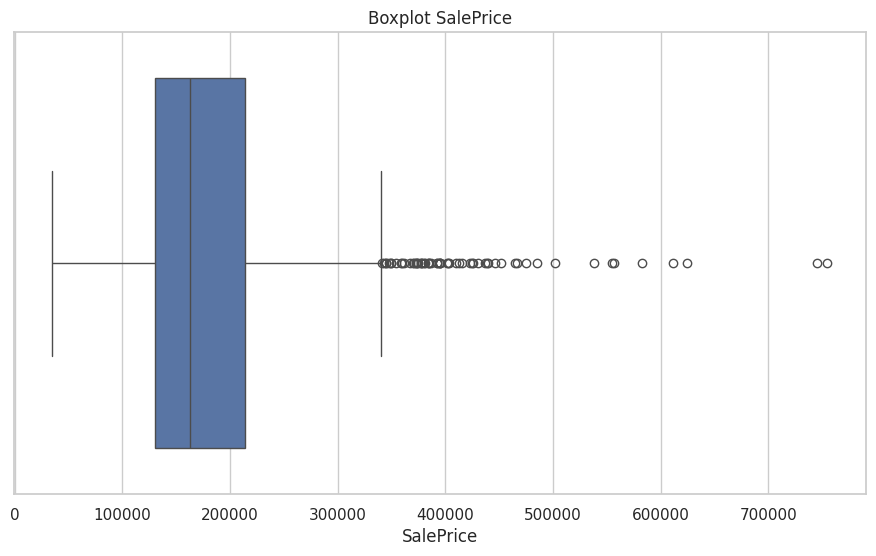

In [4]:
# Histogram SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribusi SalePrice')
plt.show()

# Boxplot
plt.figure(figsize=(11, 6))
sns.boxplot(x=train_data['SalePrice'])
plt.title('Boxplot SalePrice')
plt.show()

### Kesimpulan mengenai distribusi harga jual rumah:

#### 1. Histogram SalePrice
- **Distribusi**: Histogram menunjukkan bahwa distribusi harga jual (`SalePrice`) adalah miring ke kanan (positively skewed). Ini menunjukkan bahwa sebagian besar rumah dijual dengan harga yang relatif rendah, sementara sejumlah kecil rumah memiliki harga yang sangat tinggi.
- **Puncak Data**: Puncak dari distribusi terlihat sekitar $150,000, menunjukkan bahwa ini adalah harga jual yang paling umum.
- **Skewness**: Adanya skewness positif ini mengimplikasikan bahwa median dari harga jual akan lebih rendah daripada rata-rata harga jual, karena distribusi yang miring menarik rata-rata lebih ke arah nilai yang lebih tinggi.

#### 2. Boxplot SalePrice
- **Median**: Garis dalam boxplot yang menandakan median (nilai tengah) tampaknya berada di bawah $200,000, yang konsisten dengan skewness yang diindikasikan oleh histogram.
- **Kuartil**: Rentang interkuartil (jarak antara kuartil pertama dan ketiga yang ditandai oleh box) relatif sempit, menunjukkan bahwa sebagian besar data (50% tengah) terkonsentrasi dalam range harga yang lebih sempit.
- **Pencilan**: Terdapat banyak pencilan pada sisi kanan boxplot, menunjukkan adanya rumah-rumah dengan harga jual yang jauh lebih tinggi dibandingkan dengan sebagian besar data. Pencilan ini mungkin mewakili rumah-rumah mewah atau properti di lokasi yang sangat diinginkan.

#### Kesimpulan
Dari analisis visual:
- **Kebijakan Harga**: Skewness dan adanya banyak pencilan pada harga tinggi menunjukkan pentingnya strategi penetapan harga yang berbeda untuk berbagai segmen pasar. Rumah dengan harga rendah hingga menengah tampak lebih sering terjadi, sedangkan rumah mahal lebih jarang dan sangat bervariasi harganya.
- **Strategi Penjualan**: Untuk rumah dengan harga di atas range umum (misal di atas kuartil ketiga atau lebih tinggi dari $300,000), penjual mungkin perlu mempertimbangkan strategi pemasaran yang berbeda, seperti menargetkan pembeli khusus yang mencari properti premium.
- **Konsiderasi Investasi**: Investor mungkin tertarik pada properti yang berada di kuartil pertama dan kedua karena lebih banyak jumlahnya dan kemungkinan likuiditas yang lebih tinggi di pasar. Namun, properti di kisaran harga yang lebih tinggi mungkin menawarkan margin keuntungan yang lebih besar per transaksi, meskipun dengan risiko dan waktu penjualan yang mungkin lebih besar.

## Matriks Korelasi dan Heatmap

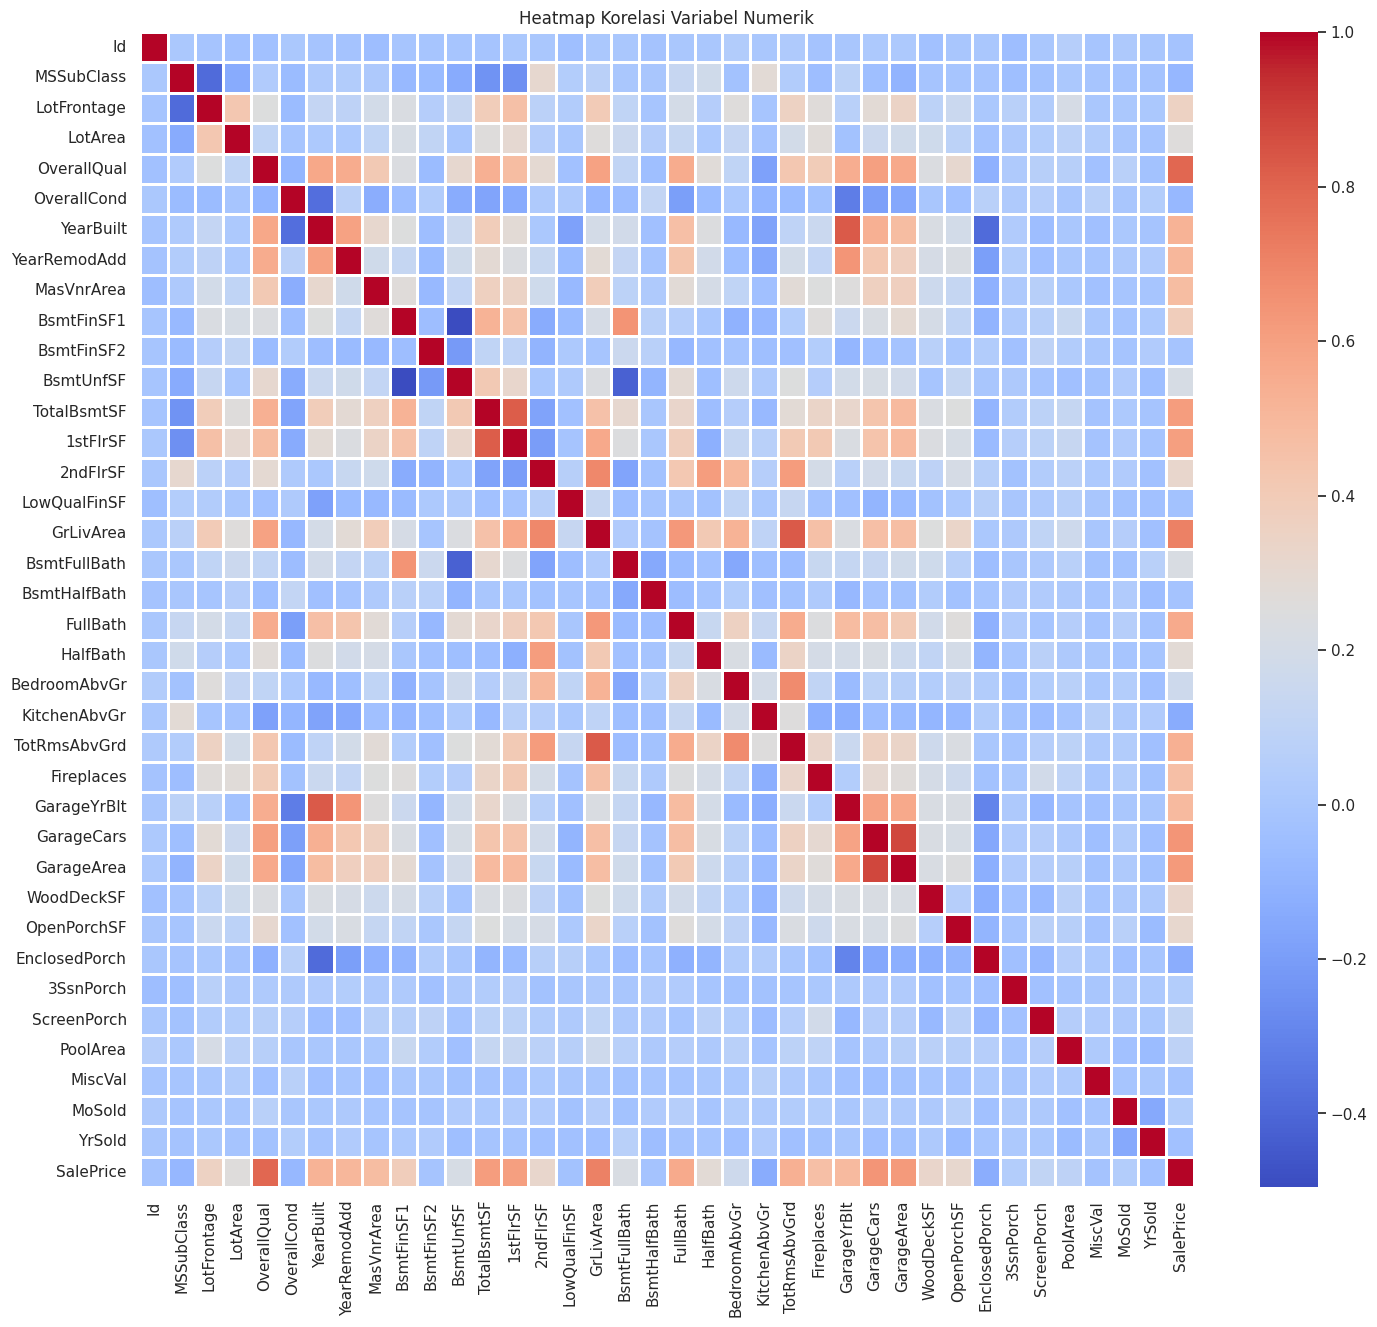

In [5]:
# Menghitung matriks korelasi dari data numerik
correlation_matrix = train_data[numerical_cols].corr()

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(17, 15))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', linewidths=1, linecolor='w')
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

### Berdasarkan heatmap korelasi variabel numerik yang ditampilkan, beberapa observasi dan implikasi dari heatmap tersebut:

#### Observasi Utama:

1. **Hubungan Kuat Positif**:
   - `TotalBsmtSF` dengan `1stFlrSF`: Menunjukkan hubungan yang sangat kuat, yang masuk akal karena kedua variabel ini sering kali mengukur area yang berhubungan atau sama di rumah (luas lantai dasar sering kali sama dengan luas basement).
   - `GrLivArea` dengan `TotRmsAbvGrd`: Hubungan yang kuat menunjukkan bahwa luas area hidup di atas tanah berkorelasi langsung dengan jumlah kamar, yang menunjukkan bahwa rumah yang lebih besar secara umum memiliki lebih banyak kamar.
   - `GarageCars` dengan `GarageArea`: Ini juga intuitif karena jumlah mobil yang dapat ditampung di garasi berkorelasi dengan luas area garasi.

2. **Hubungan Negatif Lemah**:
   - Variabel seperti `OverallCond` (kondisi keseluruhan rumah) tidak menunjukkan korelasi yang kuat dengan `SalePrice`, menunjukkan bahwa kondisi keseluruhan rumah tidak selalu merupakan faktor penentu utama harga jual.
   - `EnclosedPorch` dan `3SsnPorch` menunjukkan korelasi negatif kecil dengan beberapa variabel lain, yang mungkin menunjukkan bahwa keberadaan porch tertutup atau porch tiga musim tidak selalu menambah nilai signifikan kepada rumah, atau mungkin kurang diminati di beberapa pasar.

3. **Korelasi dengan `SalePrice`**:
   - `OverallQual` (kualitas keseluruhan bahan dan penyelesaian) memiliki korelasi positif yang signifikan dengan `SalePrice`, menandakan bahwa kualitas bahan dan penyelesaian adalah faktor penting dalam menentukan harga jual.
   - `YearBuilt` dan `YearRemodAdd` (tahun dibangun dan tahun direnovasi) juga memiliki korelasi positif dengan `SalePrice`, menegaskan bahwa rumah yang lebih baru atau yang baru direnovasi cenderung dihargai lebih tinggi.

#### Implikasi:
- **Pertimbangan untuk Penjual dan Pembeli**: Faktor seperti kualitas keseluruhan dan luas area hidup adalah pertimbangan penting saat menetapkan harga atau menawar rumah. Penjual dapat menekankan renovasi atau peningkatan kualitas untuk meningkatkan nilai jual.
- **Strategi Investasi**: Investor real estat mungkin ingin memfokuskan perhatian pada peningkatan yang meningkatkan kualitas keseluruhan dan luas area hidup karena ini memiliki dampak positif terbesar pada harga jual.
- **Desain dan Renovasi**: Memperhatikan area seperti garasi dan ruang tamu saat merencanakan renovasi dapat membantu meningkatkan nilai properti, seperti yang ditunjukkan oleh hubungan kuat dengan harga jual.

## Scatter Plot Hubungan

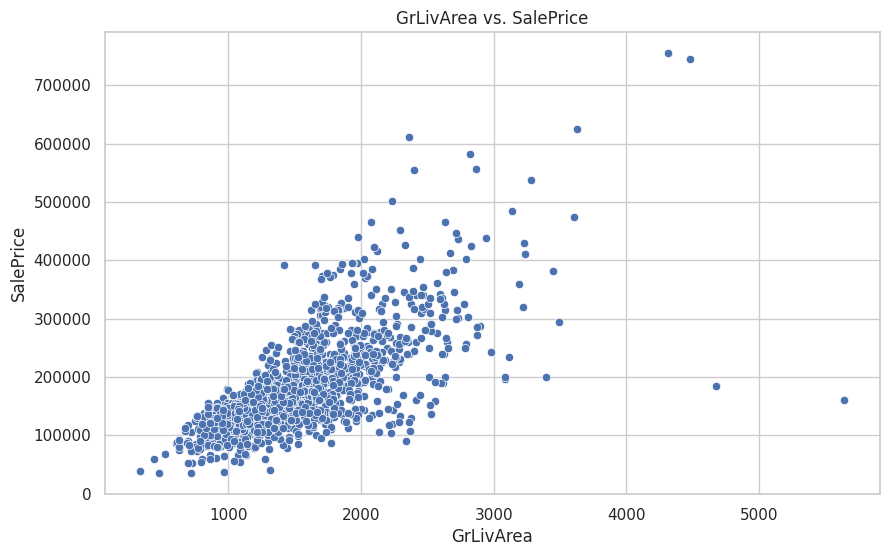

In [6]:
# Scatter plot antara GrLivArea dan SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data)
plt.title('GrLivArea vs. SalePrice')
plt.show()


### Dari scatter plot antara `GrLivArea` (luas area hidup di atas tanah) dan `SalePrice` (harga jual), beberapa kesimpulan mengenai hubungan antara luas ruang hidup dengan harga jual rumah:

#### Analisis Visual Scatter Plot:

1. **Korelasi Positif**: Terdapat tren positif yang jelas di mana `SalePrice` cenderung meningkat seiring dengan peningkatan `GrLivArea`. Ini mengindikasikan bahwa rumah dengan area hidup yang lebih luas biasanya dijual dengan harga yang lebih tinggi, yang masuk akal mengingat rumah yang lebih besar sering kali memiliki lebih banyak fasilitas dan ruang yang dapat digunakan.

2. **Distribusi Data**:
   - Sebagian besar data terkonsentrasi pada area hidup antara sekitar 500 hingga 3000 kaki persegi, dengan harga jual yang berkisar antara $100,000 hingga sekitar $400,000.
   - Ada beberapa rumah dengan `GrLivArea` yang sangat luas (lebih dari 3000 kaki persegi) dan harga jual yang juga tinggi, menunjukkan segmen pasar properti mewah.

3. **Pencilan**:
   - Terdapat beberapa pencilan, khususnya rumah-rumah dengan `GrLivArea` besar tetapi harga jual yang relatif moderat atau rendah, dan sebaliknya, rumah dengan `GrLivArea` yang tidak terlalu besar tetapi harga jual sangat tinggi.
   - Pencilan ini bisa disebabkan oleh faktor lain seperti lokasi, kondisi properti, atau fitur unik yang tidak tergambarkan hanya oleh `GrLivArea`.

#### Implikasi:

- **Penilaian Properti**: Penjual dan agen real estat dapat menggunakan informasi ini untuk menilai properti berdasarkan luas area hidup sebagai salah satu faktor penentu harga.
- **Investasi**: Investor dapat mempertimbangkan area hidup sebagai indikator penting dalam menilai potensi investasi suatu properti, terutama dalam menentukan apakah sebuah properti menawarkan nilai yang baik atau overpriced relatif terhadap luasnya.
- **Pertimbangan Desain dan Renovasi**: Untuk meningkatkan nilai jual properti, pemilik rumah mungkin mempertimbangkan untuk menambah atau merenovasi ruang hidup sebagai cara untuk menarik harga jual yang lebih tinggi.

## Analisis Kategorikal

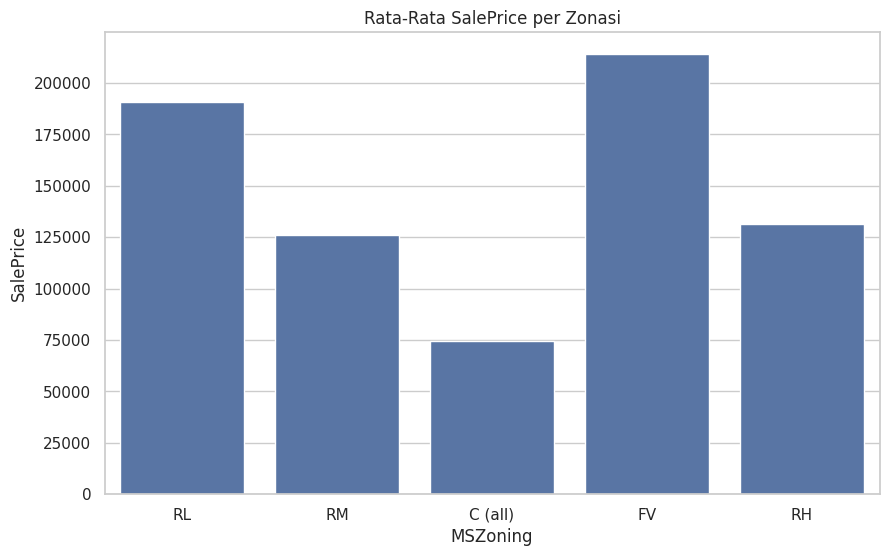

In [7]:
# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='MSZoning', y='SalePrice', data=train_data, errorbar=None)
plt.title('Rata-Rata SalePrice per Zonasi')
plt.show()

## Berdasarkan grafik batang yang menampilkan rata-rata `SalePrice` per zonasi (`MSZoning`), beberapa analisis penting mengenai pengaruh klasifikasi zonasi pada harga jual rumah. Berikut adalah penjelasan rinci dari analisis ini:

### Deskripsi Zonasi
- **RL (Residential Low Density)**: Kebanyakan properti di area ini ditujukan untuk rumah tinggal dengan kepadatan rendah.
- **RM (Residential Medium Density)**: Area ini meliputi rumah tinggal dengan kepadatan sedang.
- **C (all) (Commercial)**: Zonasi komersial di mana mungkin ada kombinasi penggunaan residensial dan komersial.
- **FV (Floating Village Residential)**: Zonasi ini biasanya mengacu pada perencanaan urban yang modern dengan campuran hunian dan ruang terbuka.
- **RH (Residential High Density)**: Area dengan kepadatan tinggi untuk rumah tinggal.

### Analisis Grafik
- **RL**: Properti di zona RL rata-rata memiliki harga jual yang tinggi, yang mungkin menunjukkan area yang lebih diinginkan untuk keluarga atau individu yang mencari lingkungan yang lebih luas dan tenang.
- **RM**: Harga jual rata-rata di zona RM lebih rendah dibandingkan dengan RL, yang konsisten dengan kepadatan yang lebih tinggi dan ketersediaan yang lebih besar dari jenis properti yang lebih kecil atau lebih terjangkau.
- **C (all)**: Zona ini menunjukkan harga jual yang paling rendah, yang mungkin disebabkan oleh desirabilitas yang lebih rendah untuk tinggal di area komersial atau campuran, atau karena struktur bangunan yang lebih lama atau kurang terawat.
- **FV**: Menunjukkan harga jual rata-rata yang sangat tinggi, menonjol sebagai zona dengan harga rata-rata tertinggi. Ini mungkin menandakan area yang sangat diinginkan dengan perencanaan komunitas terbaru dan fasilitas modern.
- **RH**: Meskipun merupakan area kepadatan tinggi, harga jualnya lebih tinggi dari RM dan C, tetapi lebih rendah dari RL dan FV. Ini bisa mencerminkan keseimbangan antara aksesibilitas dan desirabilitas.

### Implikasi
- **Strategi Pemasaran**: Pemasar properti dan agen real estat dapat menggunakan informasi ini untuk menargetkan iklan dan penawaran mereka berdasarkan preferensi dan anggaran pembeli.
- **Perencanaan dan Pengembangan**: Pengembang mungkin melihat nilai dalam mengembangkan lebih banyak properti di zona FV mengingat nilai jualnya yang tinggi, atau mungkin menemukan peluang dalam mengkonversi properti zona C menjadi tipe penggunaan yang lebih menguntungkan.
- **Kebijakan Kota**: Pemerintah lokal mungkin perlu mempertimbangkan bagaimana zonasi mempengaruhi dinamika pasar perumahan dan mungkin perlu menyesuaikan regulasi atau insentif untuk menyeimbangkan pertumbuhan dan kebutuhan warga.

# Data Preparation

In [8]:
train_info = train_data.info()
missing_values_train = train_data.isnull().sum()

train_info, missing_values_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(None,
 Id                 0
 MSSubClass         0
 MSZoning           0
 LotFrontage      259
 LotArea            0
                 ... 
 MoSold             0
 YrSold             0
 SaleType           0
 SaleCondition      0
 SalePrice          0
 Length: 81, dtype: int64)

## Handling Missing Values

### Imputer

In [9]:
# Imputers untuk numerical dan categorical
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

# Imputing missing values
train_data[numerical_cols] = imputer_num.fit_transform(train_data[numerical_cols])
train_data[categorical_cols] = imputer_cat.fit_transform(train_data[categorical_cols])

# Check missing data
remaining_missing = train_data.isnull().sum().sum()
remaining_missing

np.int64(0)

## Encode Categorical Data

In [10]:
# Encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit dan transform dengan OneHot encoding
encoded_cats = encoder.fit_transform(train_data.select_dtypes(include=['object']))

# Mengubah encoded data kedalam DataFrame
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(input_features=train_data.select_dtypes(include=['object']).columns))

# Menyambungkan encoded data back to the original dataframe
train_data.reset_index(drop=True, inplace=True)
train_data = pd.concat([train_data.select_dtypes(exclude=['object']), encoded_cats_df], axis=1)


## Feature Scaling

In [12]:
# Scaler
scaler = MinMaxScaler()

# Scaling numerical features
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])


# Feature Engineering

In [16]:
# Menambahkan 'House Age'
current_year = 2023
train_data['House_Age'] = current_year - train_data['YearBuilt']

# Initialize and apply the scaler for 'House_Age'
scaler = MinMaxScaler()
train_data['House_Age'] = scaler.fit_transform(train_data[['House_Age']])

# Modeling

In [14]:
# Setup data
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

# Membagi data menjadi training dan validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

## Linear Regression

In [26]:
# Linear Regression model
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train, y_train)

LinearRegression()

## Random Forest Regressor

In [27]:

# Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [28]:

# Evaluate Linear Regression
mae_lin = mean_absolute_error(y_valid, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_valid, y_pred_lin))
r2_lin = r2_score(y_valid, y_pred_lin)

# Evaluate Random Forest Regressor
mae_rf = mean_absolute_error(y_valid, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_valid, y_pred_rf))
r2_rf = r2_score(y_valid, y_pred_rf)

# Print the results
print("Linear Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_lin}")
print(f"Root Mean Squared Error (RMSE): {rmse_lin}")
print(f"R-squared (R²): {r2_lin}\n")

print("Random Forest Regressor Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R-squared (R²): {r2_rf}")

Linear Regression Evaluation:
Mean Absolute Error (MAE): 71626725.05946156
Root Mean Squared Error (RMSE): 561776962.9145709
R-squared (R²): -2.3697161860525683e+19

Random Forest Regressor Evaluation:
Mean Absolute Error (MAE): 0.024468779355226525
Root Mean Squared Error (RMSE): 0.04735156584604528
R-squared (R²): 0.831640676004802
